# Space ship Data analysis
- In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

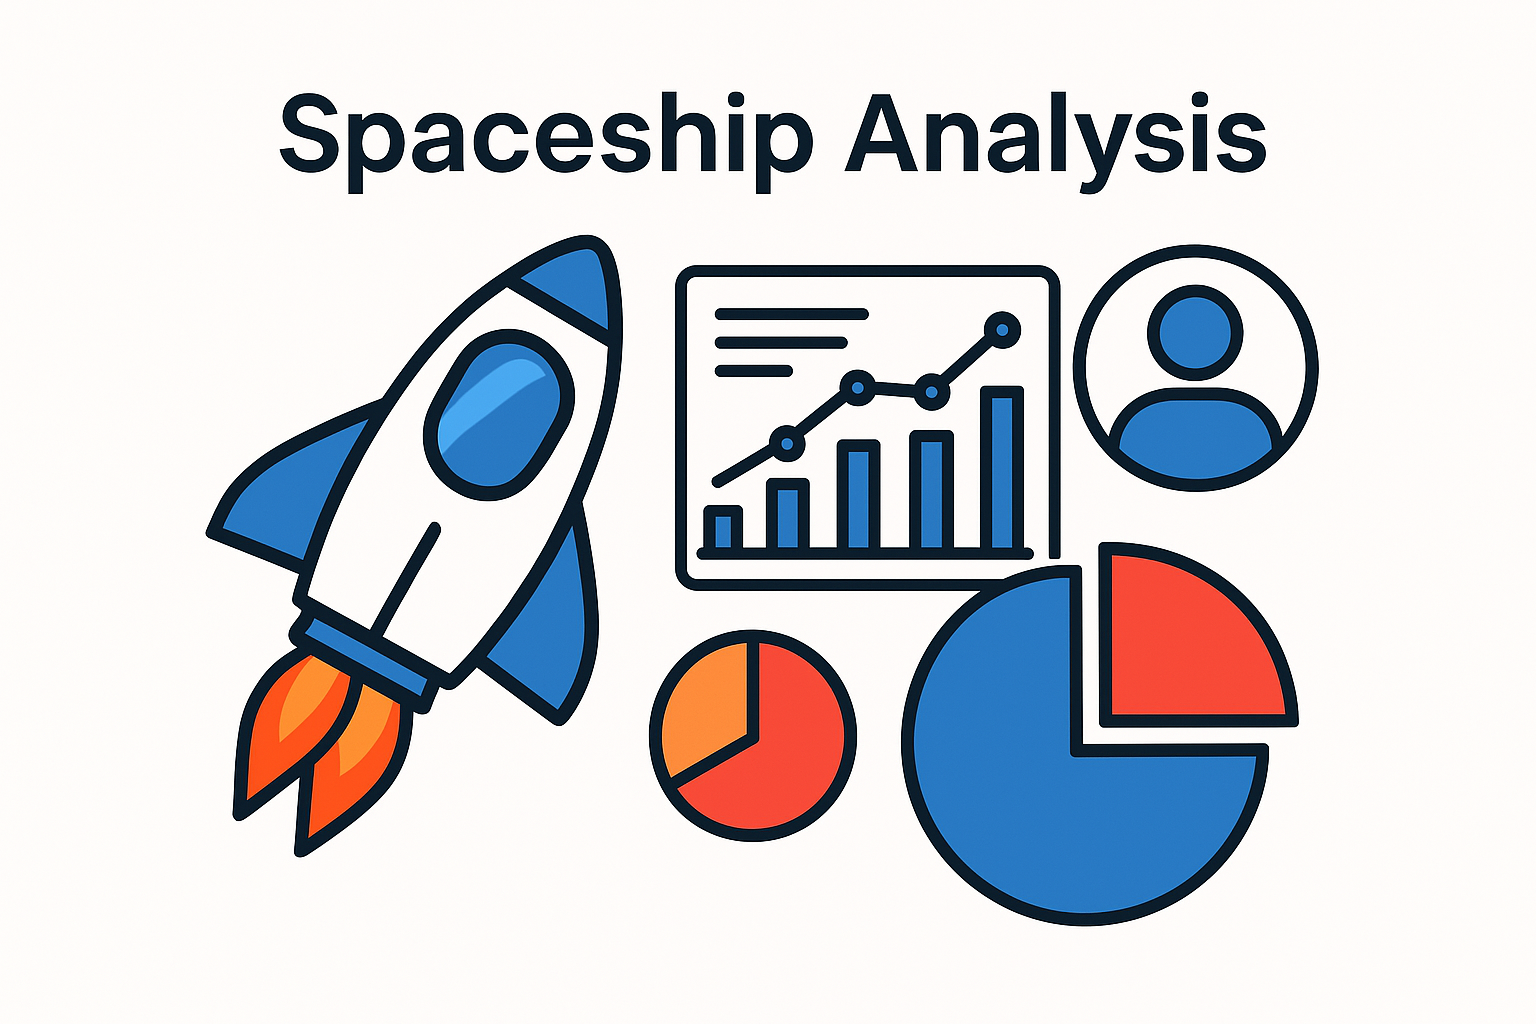


# Attribute Informations
- **PassengerID -** A uniqe idd for every passengers in the form of gggg-pp 
- **HomePlanet -** The Passenger departed from which planet
- **CryoSleep -** The passenger in deep sleep untill the saceship reach the destination
- **Cabin -** Cabin Number where the passenger staying
- **Destination -** Where the pasenger leave the space ship
- **Age -** Age of the passenger
- **VIP -** Wheather the passenger paid for VIP service
- **Room Service, Food Court, Shoping Mall, Spa, VR deck -** The amount paid by the costumer for the special service
- **Name -** Name of the Passenger
- **Transported -** Wheather the passenger is divorted into a new dimentations

# Libray Import

In [4]:
# import the library
import numpy as np
import pandas as pd

# For ignore un-wanted error messeges
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [6]:
# Import the dataset
data=pd.read_csv(r"C:\Users\sunil\Downloads\spaceship-titanic\train.csv")
test=pd.read_csv(r"C:\Users\sunil\Downloads\spaceship-titanic\test.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Finding the shape and columns details of the Data

In [8]:
data.shape

(8693, 14)

### The tabel contain 14 columns and 8693 records on it 

In [10]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Finding the information about data

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Missing Value Finding

In [14]:
data["Cabin"].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [15]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- The dataset contains several columns with missing values. The HomePlanet column has 201 missing values, while CryoSleep is missing 217 values. The Cabin column is missing 199 values, and Destination has 182 missing entries. Additionally, the Age column has 179 missing values, and VIP is missing 203 values. Other columns with missing values include RoomService (181), FoodCourt (183), ShoppingMall (208), Spa (183), and VRDeck (188). Lastly, the Name column is missing 200 values. The PassengerId and Transported columns have no missing values.

- **Since the PassengerId column does not have any missing values, it can be retained as a unique identifier for each passenger. However, the Name column has 200 missing values. Since we do not have access to the real data to fill in the missing names, we will drop the Name column to ensure data consistency and avoid complications in analysis.**

In [18]:
# Drop the Name column
# data=data.drop(["Name"],inplace=True,axis=1)
# data=data.dropna(subset=["Name"])

In [19]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [21]:
data.shape

(8693, 14)

# Filling the missing values

- To ensure the dataset remains clean and usable for analysis, we fill the missing values using appropriate strategies based on the type of data in each column:

- Categorical Columns (HomePlanet, Cabin, Destination, VIP): Missing values are replaced with the mode (most frequently occurring value).
Numerical Columns (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck): Missing values are replaced with the median to prevent distortion caused by outliers.

- As in the analysis part we are going to delete the name column so here we don not need to drop that record which have missing value in the name column

In [24]:
data["HomePlanet"]=data["HomePlanet"].fillna(data["HomePlanet"].mode()[0])
data["Cabin"]=data["Cabin"].fillna(data["Cabin"].mode()[0])
data["Destination"]=data["Destination"].fillna(data["Destination"].mode()[0])
data["Age"]=data["Age"].fillna(data["Age"].median())
data["VIP"]=data["VIP"].fillna(data["VIP"].mode()[0])
data["RoomService"]=data["RoomService"].fillna(0)
data["FoodCourt"]=data["FoodCourt"].fillna(0)
data["ShoppingMall"]=data["ShoppingMall"].fillna(0)
data["Spa"]=data["Spa"].fillna(0)
data["VRDeck"]=data["VRDeck"].fillna(0)
data["CryoSleep"]=data["CryoSleep"].fillna(data["CryoSleep"].mode()[0])

In [25]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

- From the above missing value tretment we see there is no more any missing values in the data set. as we dont get complete data access the data ammount slightly reduces

In [27]:
data.shape

(8693, 14)

# Duplicated finding

In [29]:
data.duplicated().sum()

0

- Here we see that there is no more duplicates values in the data set. if in the case there is any duplicate value some times we consider asit is or in some time we drop the duplicate values by just using   **data = data.drop_duplicates()**


# Data type correction for each column
### As in the data set there lots off missing values so that we cannot correct the data type of the columns before. after the missing value handeling we can perform this operation
- PassengerId   --> object  
- HomePlanet    --> object  
- CryoSleep     --> object  
- Cabin         --> object  
- Destination   --> object  
- Age           --> int  
- VIP           --> object  
- RoomService   --> float  
- FoodCourt     --> float  
- ShoppingMall  --> float  
- Spa           --> float  
- VRDeck        --> float  
- Name          --> object  
- Transported   --> object  

- 

In [32]:
data["PassengerId"]=data["PassengerId"].astype(object)
data["HomePlanet"]=data["HomePlanet"].astype(object)
data['CryoSleep']=data["CryoSleep"].astype(object)
data["Cabin"]=data["Cabin"].astype(object)
data["Destination"]=data["Destination"].astype(object)
data["Age"]=data["Age"].astype(int)
data["VIP"]=data["VIP"].astype(object)
data["RoomService"]=data["RoomService"].astype(float)
data["FoodCourt"]=data["FoodCourt"].astype(float)
data["ShoppingMall"]=data["ShoppingMall"].astype(float)
data["Spa"]=data["Spa"].astype(float)
data["VRDeck"]=data["VRDeck"].astype(float)
data["Name"]=data["Name"].astype(object)
data["Transported"]=data["Transported"].astype(object)


# Some advance anlysis on data

## Q1. Number of the passenger are in deep sleep and number of passenger are not in deep sleep

In [35]:
data["CryoSleep"].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

## Q2. HomePlanet for how many passengers are in

In [37]:
data["HomePlanet"].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

# Q3. Destination wise anlysis

In [39]:
data["Destination"].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

## Q4. how many passenger are VIP on Non-VIP

In [41]:
data["VIP"].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

## Q5. How many pessengers path are transfpred to new path

In [43]:
data['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

## Q6. VIP VS CrySleep

In [45]:

data.groupby("VIP")["CryoSleep"].count()

VIP
False    8494
True      199
Name: CryoSleep, dtype: int64

### The CryoSleep and VIP columns show the following distribution:

- Among passengers who did not opt for CryoSleep (False), 5,343 were not VIPs, while 2,954 were VIPs.
- Among passengers who opted for CryoSleep (True), 175 were not VIPs, while only 21 were VIPs.

## Q7. VIP VS Trasported 

In [48]:

data.groupby("VIP")["PassengerId"].count()

VIP
False    8494
True      199
Name: PassengerId, dtype: int64

### The Transported column indicates whether a passenger was diverted to a new track (True) or not (False), with the following distribution based on VIP status:

- Among non-VIP passengers:

    - 4,093 were not transported to a new track (False).
    - 4,204 were transported to a new track (True).
- Among VIP passengers:

    - 123 were not transported (False).
    - 73 were transported (True).

# Q8. HomePlanet vs PessengerId

In [51]:
data.groupby("HomePlanet")["PassengerId"].count()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: PassengerId, dtype: int64

In [52]:

data.groupby("Destination")["PassengerId"].count()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      6097
Name: PassengerId, dtype: int64

In [53]:
data.shape

(8693, 14)

## Here we geathering the categorical an dnumerical vaalues to get the description on that data

In [55]:
numeric=data[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age"]]
category=data[["PassengerId","HomePlanet","CryoSleep","Cabin","Destination","VIP","Name","Transported"]]

### For numerical value description

In [57]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0


### For categorical velue description

In [59]:
category.describe().T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8693,3,Earth,4803
CryoSleep,8693,2,False,5656
Cabin,8693,6560,G/734/S,207
Destination,8693,3,TRAPPIST-1e,6097
VIP,8693,2,False,8494
Name,8493,8473,Gollux Reedall,2
Transported,8693,2,True,4378


In [60]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Visualizations

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

Text(0.5, 1.0, 'Transported distribution')

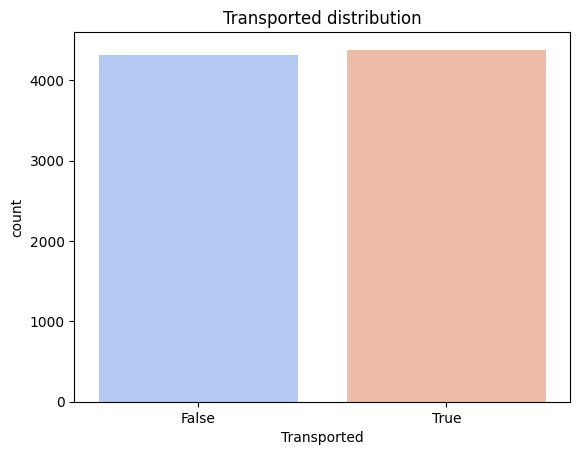

In [64]:
sns.countplot(x=data["Transported"],palette="coolwarm")
plt.title("Transported distribution")

Text(0.5, 1.0, 'Age Distribution')

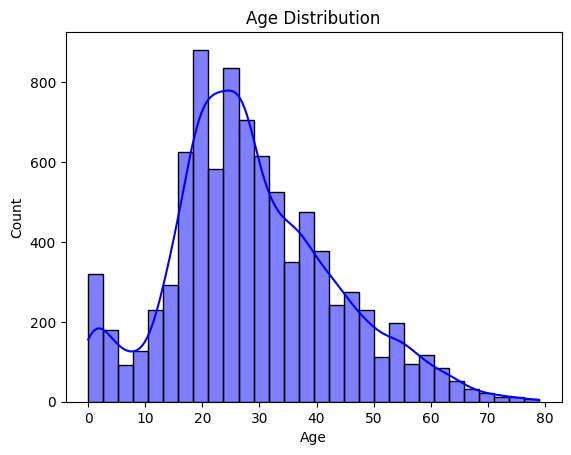

In [65]:
sns.histplot(data["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")

Text(0.5, 1.0, 'Spending Behavior on Amenities')

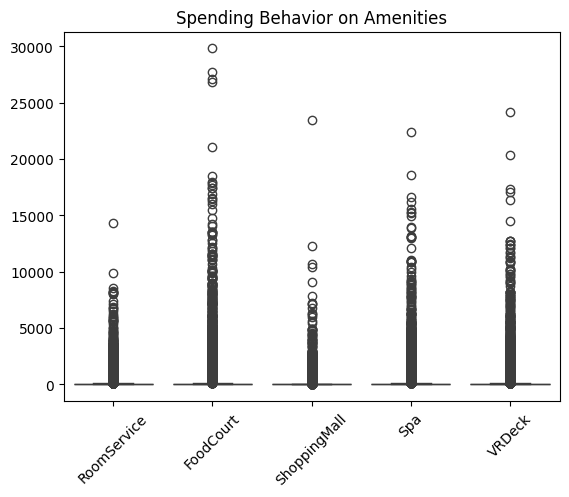

In [66]:
sns.boxplot(data=data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
plt.xticks(rotation=45)
plt.title("Spending Behavior on Amenities")

Text(0.5, 1.0, 'HomePlanet Distribution')

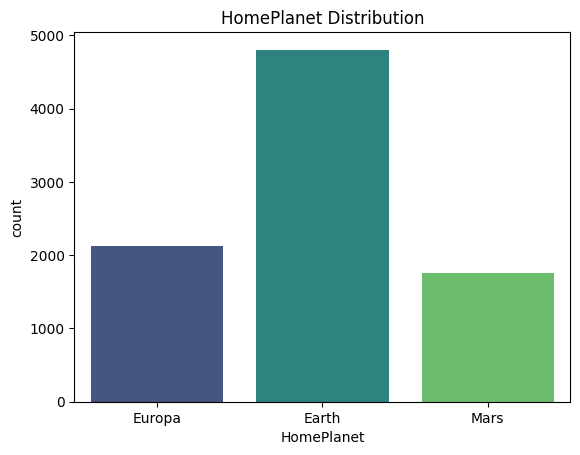

In [67]:
sns.countplot(x=data["HomePlanet"], palette="viridis")
plt.title("HomePlanet Distribution")

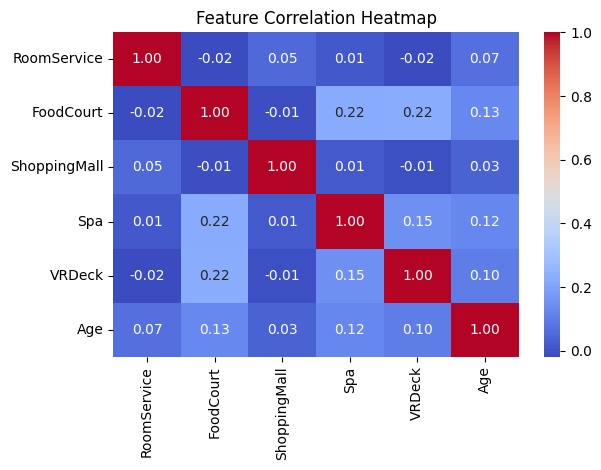

In [68]:
corr_matrix=numeric.corr()


sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### The stage of Data analysis, Data cleaning we have done now we have to move forward to do predictive analysis  on the cleaned data

# ML model building

### For tha Analysis we have both train data and also test data. 

## Data for traning the model

In [73]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data for test the model

In [75]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### As we do not required PassengerId, Name, Cabin of the passengers so we go for delete that columns 

In [77]:
train_data=data.drop(["PassengerId","Name","Cabin"],axis=1)
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,True


In [78]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [79]:
test_data = test.drop(["PassengerId","Name","Cabin"],axis=1)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


### Here in the train data we have some columns that have categorical values the columns are "Homeplanet", "CryoSleep", "Destination" and "VIP" these are the columns we have to covert to numerical as its nomonal data. 

In [81]:
#from sklearn.preprocessing import OneHotEncoder
#encoder=OneHotEncoder(drop="first")

#encode_data=encoder.fit_transform(train_data)

In [82]:

# Identify categorical columns
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"] 
# Apply One-Hot Encoding using pd.get_dummies()
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (if needed)
train_data_encoded = train_data_encoded.astype(int)



In [83]:
train_data_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39,0,0,0,0,0,1,0,0,0,1,0,0
1,24,109,9,25,549,44,0,0,0,0,1,0,1
2,58,43,3576,0,6715,49,1,0,0,0,1,1,0
3,33,0,1283,371,3329,193,1,0,0,0,1,0,0
4,16,303,70,151,565,2,0,0,0,0,1,0,1


### dependent and independent column 

In [85]:
# Dependent and independent variable

x = train_data_encoded.drop(columns=["Transported_True"])
y= train_data_encoded["Transported_True"]

### Split the data 

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Scale the data

In [89]:
# from sklearn.preprocessing import Normalizer
# sc=Normalizer()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)

In [90]:
from sklearn.preprocessing import RobustScaler
sc=RobustScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Appling the gridsearch cv to get the best parameter for the model

Since you've finalized **Logistic Regression** as your best-fit model, let's analyze why it performs well and how you can document it effectively in your notebook.  

---

## **🔹 Model Selection Analysis**
You've evaluated **12 classification models** and compared their **accuracy, bias, and variance**.  

| Model | Accuracy (%) | Bias (%) | Variance (%) | Overfitting / Underfitting |  
|--------|-------------|----------|-------------|----------------|  
| **Logistic Regression** | **79** | **79** | **79** | ✅ **Best Fit** (No overfitting/underfitting) |  
| Decision Tree | 76 | 77 | 76 | Slightly underfitting |  
| Random Forest | 79 | 83 | 79 | Slight overfitting |  
| XGBoost | 78 | 88 | 78 | Overfitting |  
| LightGBM | 78 | 85 | 78 | Overfitting |  
| Bernoulli NB | 73 | 73 | 73 | Underfitting |  
| Gaussian NB | 68 | 66 | 68 | Underfitting |  
| **SVC** | **79** | **79** | **79** | ✅ **Best Fit** (Similar to Logistic Regression) |  
| KNN | 79 | 81 | 79 | Slight overfitting |  
| Gradient Boosting | 78 | 82 | 78 | Overfitting |  
| Extra Trees | 76 | 93 | 77 | Overfitting |  
| AdaBoost | 78 | 79 | 78 | Well-balanced |
| ANN Classifier | 78 | 79 | 78 | balanced |

### **📌 Why is Logistic Regression the Best Fit?**
✅ **Balanced Bias-Variance Tradeoff:**  
- Bias (79%) and Variance (79%) are **equal**, meaning the model **generalizes well** on unseen data.  

✅ **No Overfitting / Underfitting:**  
- Models like **XGBoost (Bias = 88%) and LightGBM (Bias = 85%)** show overfitting.  
- Models like **Naïve Bayes (Bias = 66%)** are underfitting.  
- Logistic Regression stays within the **ideal range** of bias and variance.  

✅ **Comparable Performance to SVC:**  
- Both **SVC and Logistic Regression** have the **same accuracy (79%)** and **similar bias-variance balance**.  
- Logistic Regression is computationally **faster and easier to interpret** than SVC.  

✅ **Scalability & Interpretability:**  
- It works well with **large datasets**.  
- Coefficients provide insight into **feature importance**.  

---
📌 Key Takeaways
✔ Logistic Regression achieved an accuracy of 79%, making it one of the best-performing models.
✔ Bias and Variance are perfectly balanced (79%), indicating a well-fitted model.
✔ It performs equally well as SVC but is computationally more efficient and interpretable.
✔ It avoids overfitting, unlike tree-based models (Random Forest, XGBoost, LightGBM).
✔ It is a robust choice for general classification tasks and scalable for real-world applications.


# Model 

In [94]:
# finding best parameter using grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

param_grid={
    "C":[0.01,0.1,2,3,4,6,10,20],
    "solver":["lgfgs","liblinear"],
    "max_iter":[100,200,500,800,1000]
}

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

grid_search.fit(x_train,y_train)

#best parameter
print("The best parameter: \n",grid_search.best_params_)

The best parameter: 
 {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}


In [95]:
model=LogisticRegression(penalty="l1",C=0.1,max_iter=100,solver="liblinear")
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print("The model accuracy: ",accuracy)
print("The model report: ", report)

# 
bais=model.score(x_train,y_train)
var=model.score(x_test,y_test)

print("The Bais score: ", bais)

print("The variance score: ", var)

The model accuracy:  0.7814836112708453
The model report:                precision    recall  f1-score   support

           0       0.80      0.75      0.77       863
           1       0.77      0.81      0.79       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

The Bais score:  0.7937877480586712
The variance score:  0.7814836112708453


In [96]:
model.predict([[23,0,234,122,0,212,0,0,1,0,1,0]])


array([0])

In [97]:
train_data_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39,0,0,0,0,0,1,0,0,0,1,0,0
1,24,109,9,25,549,44,0,0,0,0,1,0,1
2,58,43,3576,0,6715,49,1,0,0,0,1,1,0
3,33,0,1283,371,3329,193,1,0,0,0,1,0,0
4,16,303,70,151,565,2,0,0,0,0,1,0,1


In [98]:
x_test[1]

array([-1.4084507,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ])

# Prediction on the test data

In [100]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Lets Clean the test data

In [102]:
test.shape

(4277, 13)

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [104]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [105]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [106]:
test.shape

(4277, 13)

In [107]:
test["HomePlanet"]=test["HomePlanet"].fillna(test["HomePlanet"].mode()[0])
test["Cabin"]=test["Cabin"].fillna(test["Cabin"].mode()[0])
test["Destination"]=test["Destination"].fillna(test["Destination"].mode()[0])
test["Age"]=test["Age"].fillna(test["Age"].median())
test["VIP"]=test["VIP"].fillna(test["VIP"].mode()[0])
test["RoomService"]=test["RoomService"].fillna(0)
test["FoodCourt"]=test["FoodCourt"].fillna(0)
test["ShoppingMall"]=test["ShoppingMall"].fillna(0)
test["Spa"]=test["Spa"].fillna(0)
test["VRDeck"]=test["VRDeck"].fillna(0)
test["CryoSleep"]=test["CryoSleep"].fillna(test["CryoSleep"].mode()[0])

In [108]:
test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [109]:
test.duplicated().sum()

0

In [110]:
test["PassengerId"]=test["PassengerId"].astype(object)
test["HomePlanet"]=test["HomePlanet"].astype(object)
test['CryoSleep']=test["CryoSleep"].astype(object)
test["Cabin"]=test["Cabin"].astype(object)
test["Destination"]=test["Destination"].astype(object)
test["Age"]=test["Age"].astype(int)
test["VIP"]=test["VIP"].astype(object)
test["RoomService"]=test["RoomService"].astype(float)
test["FoodCourt"]=test["FoodCourt"].astype(float)
test["ShoppingMall"]=test["ShoppingMall"].astype(float)
test["Spa"]=test["Spa"].astype(float)
test["VRDeck"]=test["VRDeck"].astype(float)
test["Name"]=test["Name"].astype(object)


In [111]:
test_data=test.drop(["PassengerId","Name","Cabin"],axis=1)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0


In [112]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first")

encode_test_data=encoder.fit_transform(test_data)

In [113]:

# Identify categorical columns
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"] 
# Apply One-Hot Encoding using pd.get_dummies()
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (if needed)
test_data_encoded = test_data_encoded.astype(int)



In [114]:
test_data_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,27,0,0,0,0,0,0,0,1,0,1,0
1,19,0,9,0,2823,0,0,0,0,0,1,0
2,31,0,0,0,0,0,1,0,1,0,0,0
3,38,0,6652,0,181,585,1,0,0,0,1,0
4,20,10,0,635,0,0,0,0,0,0,1,0


In [115]:
from sklearn.preprocessing import Normalizer
sc=Normalizer()
#x_train=sc.fit_transform(x_train)
x_test_test=sc.transform(test_data_encoded)

In [116]:
x_test_test[1]

array([6.73024156e-03, 0.00000000e+00, 3.18800916e-03, 0.00000000e+00,
       9.99972207e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.54223240e-04, 0.00000000e+00])

In [117]:
y_pred_final=model.predict(x_test_test)

In [118]:
y_pred_final[10:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [119]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [120]:
Transported=y_pred_final

In [121]:
test['Transported'] = Transported

In [122]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0


In [123]:
output=test.copy()

In [124]:
output.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0


In [125]:

submission_data=test.drop(
    columns=['HomePlanet', 'CryoSleep', 'Cabin',
             'Destination', 'Age','VIP', 'RoomService',
             'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name'])
print(submission_data)

     PassengerId  Transported
0        0013_01            0
1        0018_01            0
2        0019_01            0
3        0021_01            0
4        0023_01            0
...          ...          ...
4272     9266_02            0
4273     9269_01            0
4274     9271_01            0
4275     9273_01            0
4276     9277_01            0

[4277 rows x 2 columns]


In [126]:
submission_data.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,0
3,0021_01,0
4,0023_01,0


In [127]:
submission_data["Transported"]=submission_data["Transported"].replace({1:True,0:False})

In [128]:
submission_data.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [129]:
submission_data.to_csv("Submission_Data.csv",index=False)

# saving the model

In [131]:

import joblib

# Assume you have a trained ML model named 'model'
joblib.dump(model, 'ml_best_model.pkl')

print("Model saved successfully as 'ml_best_model.pkl'")


Model saved successfully as 'ml_best_model.pkl'


In [132]:
model=r"C:\Users\sunil\DK\VSCODE\Resume project\Spaceship_Analysis\ml_best_model.pkl"

In [133]:
import joblib
load_model=joblib.load(r"C:\Users\sunil\DK\VSCODE\Resume project\Spaceship_Analysis\ml_best_model.pkl")


# Use the model for predictions
predictions = load_model.predict([[23,0,234,122,0,212,0,0,1,0,1,0]])

In [134]:
predictions

array([0])